### KHUSHI 19103055
#### ANOVA - One Way, Two Way.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats
from statistics import mean
import statsmodels as sm
import pingouin as pg

In [2]:
data=pd.read_csv('crop.data.csv')
data.head()

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486


In [3]:
data.describe()

,density,block,fertilizer,yield
count,96.000000,96.000000,96.000000,96.000000
mean,1.500000,2.500000,2.000000,177.015476
std,0.502625,1.123903,0.820783,0.664548
min,1.000000,1.000000,1.000000,175.360840
25%,1.000000,1.750000,1.000000,176.468696
50%,1.500000,2.500000,2.000000,177.058105
75%,2.000000,3.250000,3.000000,177.398571
max,2.000000,4.000000,3.000000,179.060899


In [4]:
data.groupby(by='fertilizer')['fertilizer'].count()

fertilizer
1    32
2    32
3    32
Name: fertilizer, dtype: int64

In [5]:
def OneWay(Samples,K,Y,inbuilt=0):
    if(inbuilt):
        return scipy.stats.f_oneway(*Samples)
    else:
        Yg=[]
        Ng=[]
        sumB=0 #explained sum = sum(df*group mean devn from combined mean)
        sumW=0 #unexplained sum = sum(squares (y[i][j]-y[i]))
        df=0 #total degrees of freedom
        for i in range(0,K):
            Yg.append(Samples[i].mean())
            Ng.append(Samples[i].shape[0])
            df+=Ng[i]
            sumB+=Ng[i]*(np.square(Yg[i]-Y))
            for y in Samples[i]:
                sumW+=np.square(y-Yg[i])   #or (Ng-1)*std_dev(Samples[i])
              
        df-=K  
        #mean sum of squares between  and within  
        MSB=sumB/(K-1)
        MSW=sumW/(df)
        
        return MSB/MSW,scipy.stats.f.sf(MSB/MSW, K-1,df)
    

With Inbuilt Function : 
F_onewayResult(statistic=7.862751645215487, pvalue=0.0006999157502874401)
Without Inbuilt Function : 
(7.862751645215538, 0.0006999157502874105)


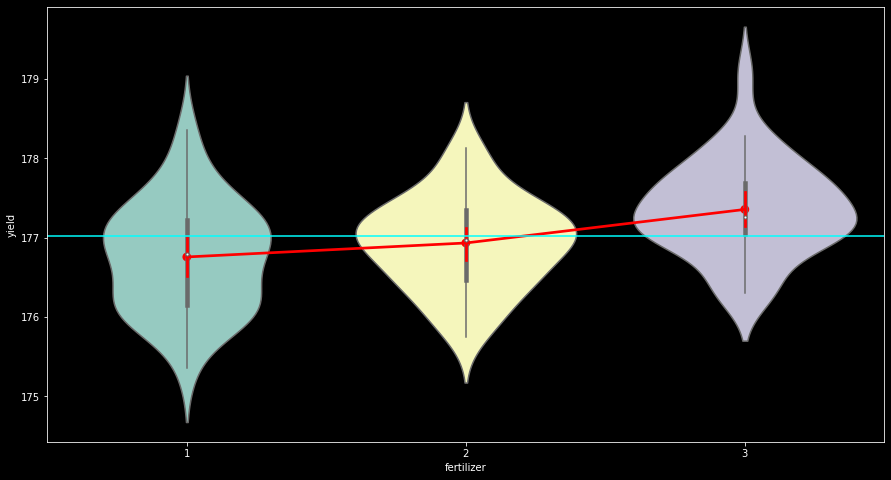

In [6]:
F1=data[data['fertilizer']==1]['yield']
F2=data[data['fertilizer']==2]['yield']
F3=data[data['fertilizer']==3]['yield']
#Combined mean
Y=data['yield'].mean()
print("With Inbuilt Function : ")
print(OneWay([F1,F2,F3],3,Y,1))
print("Without Inbuilt Function : ")
print(OneWay([F1,F2,F3],3,Y,0))
plt.figure(figsize=(15,8))
fig=sns.violinplot(x=data['fertilizer'],y=data['yield'])
fig=sns.pointplot(x=data['fertilizer'],y=data['yield'],color="red")
fig.axhline(Y,color='aqua')


In [7]:
data.groupby(['density','fertilizer'])['yield'].mean().reset_index()

,density,fertilizer,yield
0,1,1,176.439598
1,1,2,176.778288
2,1,3,177.135608
3,2,1,177.074491
4,2,2,177.088139
5,2,3,177.576732


In [8]:
data2=pd.read_csv('poison-data.csv')
data2.head()

,Person,time,poison,treat
0,1,0.31,1,A
1,2,0.45,1,A
2,3,0.46,1,A
3,4,0.43,1,A
4,5,0.36,2,A


In [9]:
a=data2[data2['treat']=='A']['time']
b=data2[data2['treat']=='B']['time']
c=data2[data2['treat']=='C']['time']
d=data2[data2['treat']=='D']['time']
print("With Inbuilt Function : ")
print(OneWay([a,b,c,d],4,data2['time'].mean(),1))
print("Without Inbuilt Function : ")
print(OneWay([a,b,c,d],4,data2['time'].mean(),0))

With Inbuilt Function : 
F_onewayResult(statistic=6.483606262371779, pvalue=0.0009920770773107095)
Without Inbuilt Function : 
(6.483606262371781, 0.0009920770773107095)


### TWO WAY ANOVA

In [10]:
data2.head()

,Person,time,poison,treat
0,1,0.31,1,A
1,2,0.45,1,A
2,3,0.46,1,A
3,4,0.43,1,A
4,5,0.36,2,A


In [11]:
#making a pivot table for visualization
sampletable=pd.pivot_table(data=data2,index=['poison'],columns=['treat'],values='time',aggfunc='mean')
sampletable


treat,A,B,C,D
poison,,,,
1,0.4125,0.880,0.5675,0.6100
2,0.3200,0.815,0.3750,0.6675
3,0.2100,0.335,0.2350,0.3250


<AxesSubplot:xlabel='treat', ylabel='poison'>

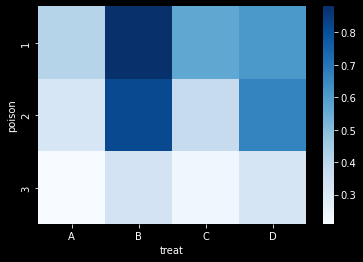

In [12]:
sns.heatmap(sampletable,cmap="Blues")

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('time ~ C(treat) + C(poison) + C(treat):C(poison)', data=data2).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(treat),3.0,0.921206,0.307069,13.805582,3.777331e-06
C(poison),2.0,1.033013,0.516506,23.221737,3.331440e-07
C(treat):C(poison),6.0,0.250138,0.041690,1.874333,1.122506e-01
Residual,36.0,0.800725,0.022242,NaN,NaN


In [14]:
data2.groupby(['treat','poison'])['time'].mean().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11
treat,A,A,A,B,B,B,C,C,C,D,D,D
poison,1,2,3,1,2,3,1,2,3,1,2,3
time,0.4125,0.32,0.21,0.88,0.815,0.335,0.5675,0.375,0.235,0.61,0.6675,0.325


In [15]:
def residuals(data,col1,col2,affected):
     meangroup=data2.groupby([col1,col2])[affected].mean().reset_index()
     def func(x):
          m=meangroup.loc[(meangroup[col1]==x[col1]) & (meangroup[col2]==x[col2])][affected].sum()
          x['Sresidual']=np.square(x[affected]-m)
          return x

     data=data.apply(lambda x: func(x),axis=1)
     return data['Sresidual'].sum()
residuals(data2,'treat','poison','time')

0.8007249999999999

In [16]:
def TwoWay(data,col1,col2,affected,inbuilt=0):
    if(inbuilt):
        aov = pg.anova(dv=affected, between=[col1,col2], data=data,detailed=True)
        return aov
    else:
        meangroup=data.groupby([col1,col2])[affected].mean().reset_index()
        def residuals(data):
            def func(x):
                m=meangroup.loc[(meangroup[col1]==x[col1]) & (meangroup[col2]==x[col2])][affected].sum()
                x['Sresidual']=np.square(x[affected]-m)
                return x

            data=data.apply(lambda x: func(x),axis=1)
            return data['Sresidual'].sum()
    
        Xval=meangroup[col1].unique()
        Yval=meangroup[col2].unique()
        meanX=[]
        meanY=[]
        r=data.shape[0]-meangroup.shape[0] #residual df = data.size(n)-unique blocks(group by both cols)
        df=[(len(Xval)-1),(len(Yval)-1),(len(Xval)-1)*(len(Yval)-1),r]  
        SS=[]
        Nx=list(data.groupby(col1)[affected].count())
        Ny=list(data.groupby(col2)[affected].count())
        for i in Xval: 
           meanX.append(meangroup[meangroup[col1]==i][affected].mean())
        for i in Yval:
            meanY.append(meangroup[meangroup[col2]==i][affected].mean())
        Tmean=mean(meanX+meanY)
        SST= np.square(list(data['time']-Tmean)).sum()  #Total sum of squares
        sumBX=0 #explained sum along X = sum(df*group mean X devn from combined mean)
        sumBY=0 #explained sum along Y = sum(df*group mean Y devn from combined mean)
        for i in range (0,len(Xval)):
            sumBX+=Nx[i]*np.square(meanX[i]-Tmean)
        for i in range (0,len(Yval)):
            sumBY+=Ny[i]*np.square(meanY[i]-Tmean)
        SSR=residuals(data)  #residual - unexplained error
        SSE=SST-sumBX-sumBY-SSR
        #SSE = total errror - error from a - error from b - residual 
        MSX=sumBX/df[0]
        MSY=sumBY/df[1]
        MSE=SSE/df[2]
        MSR=SSR/df[3]
        SS=[sumBX,sumBY,SSE,SSR]
        MS=[MSX,MSY,MSE,MSR]
        F=MS/MSR
        F[3]=np.nan
        P=[]
        np2=SS/(SSR+SS)
        np2[3]=np.nan
        for i in range(4):
            P.append(scipy.stats.f.sf(F[i],df[i],r))
        return pd.DataFrame({'Source':[col1,col2,col1+"*"+col2,"residual"],
                             'DF':df,'SS':SS,'MS':MS,'F':F,'P':P,'np2':np2})

In [17]:
print(" Two way Anova without Inbuilt Function : \n")
print(TwoWay(data2,'treat','poison','time',0),"\n\n")
print(" Two way Anova with Inbuilt Function : \n")
print(TwoWay(data2,'treat','poison','time',1),"\n")

 Two way Anova without Inbuilt Function : 

         Source  DF        SS        MS          F             P       np2
0         treat   3  0.921206  0.307069  13.805582  3.777331e-06  0.534984
1        poison   2  1.033012  0.516506  23.221737  3.331440e-07  0.563337
2  treat*poison   6  0.250138  0.041690   1.874333  1.122506e-01  0.238031
3      residual  36  0.800725  0.022242        NaN           NaN       NaN 


 Two way Anova with Inbuilt Function : 

           Source        SS  DF        MS          F         p-unc       np2
0           treat  0.921206   3  0.307069  13.805582  3.777331e-06  0.534984
1          poison  1.033013   2  0.516506  23.221737  3.331440e-07  0.563337
2  treat * poison  0.250137   6  0.041690   1.874333  1.122506e-01  0.238031
3        Residual  0.800725  36  0.022242        NaN           NaN       NaN 



# DONE!!